In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2 = np.random.rand(2, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - 0.2) * freq1) + 0.5 * np.sin((time - 0.2) * freq2)
    return series[..., np.newaxis].astype(np.float32)

In [ ]:
TIME_STEPS = 20
BATCH_SIZE = 64

In [ ]:
X_train = generate_time_series(BATCH_SIZE * 1000, TIME_STEPS + 1)
X_test = generate_time_series(BATCH_SIZE * 200, TIME_STEPS + 1)

In [ ]:
X_train, y_train = X_train[:, :TIME_STEPS], X_train[:, -1]
X_test, y_test = X_test[:, :TIME_STEPS], X_test[:, -1]

In [ ]:
model = Sequential([
    Bidirectional(LSTM(32, return_sequences=False), input_shape=[TIME_STEPS, 1]),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/10


1000/1000 [==============================] - 14s 10ms/step - loss: 0.0021 - mae: 0.0116 - val_loss: 9.9314e-06 - val_mae: 0.0023
Epoch 2/10
1000/1000 [==============================] - 9s 9ms/step - loss: 1.0148e-05 - mae: 0.0024 - val_loss: 1.2171e-05 - val_mae: 0.0024
Epoch 3/10
1000/1000 [==============================] - 9s 9ms/step - loss: 1.0261e-05 - mae: 0.0024 - val_loss: 1.1188e-05 - val_mae: 0.0023
Epoch 4/10
1000/1000 [==============================] - 9s 9ms/step - loss: 1.0062e-05 - mae: 0.0024 - val_loss: 1.0108e-05 - val_mae: 0.0026
Epoch 5/10
1000/1000 [==============================] - 9s 9ms/step - loss: 1.0217e-05 - mae: 0.0024 - val_loss: 1.2134e-05 - val_mae: 0.0024
Epoch 6/10
1000/1000 [==============================] - 9s 9ms/step - loss: 9.2892e-06 - mae: 0.0023 - val_loss: 8.8733e-06 - val_mae: 0.0022
Epoch 7/10
1000/1000 [==============================] - 9s 9ms/step - loss: 8.7376e-06 - mae: 0.0023 - val_loss: 1.0061e-05 - val_mae: 0.0024
Epoch 

In [ ]:

y_pred = model.predict(X_test[:10])

1/1 [==============================] - 1s 751ms/step


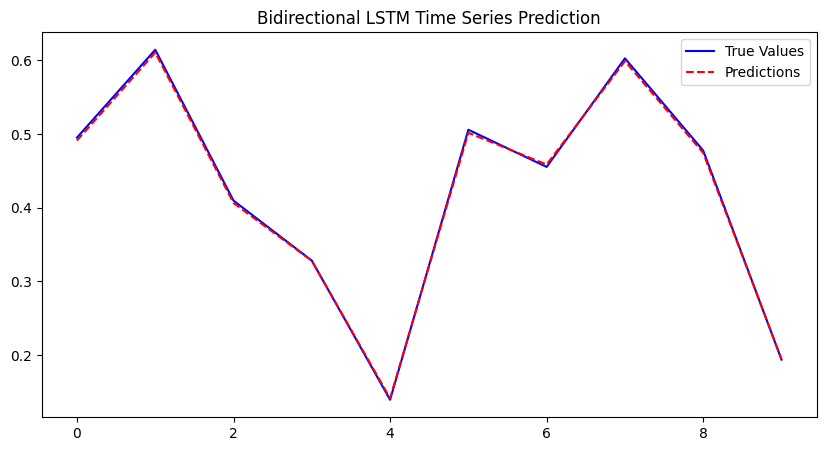

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(y_test[:10], "b-", label="True Values")
plt.plot(y_pred, "r--", label="Predictions")
plt.legend()
plt.title("Bidirectional LSTM Time Series Prediction")
plt.show()